In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_excel('ENB2012_data.xlsx')

In [3]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [4]:
df = df.rename(columns = column_names)

In [5]:
#select the sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness','Cooling_Load']].sample(15, random_state = 2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

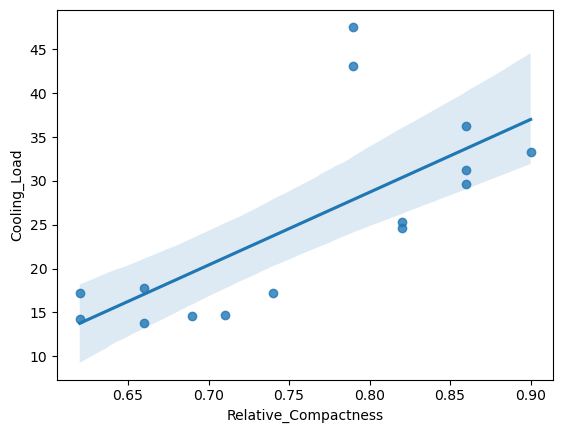

In [6]:
#regression Plot
sns.regplot(x = "Relative_Compactness", y = "Cooling_Load",
           data = simple_linear_reg_df)

# Measuring Regression Performance


## Mean Absolute Error (MAE)


In [7]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [8]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


In [10]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.063

## Residual Sum of Squares (RSS) 


In [11]:

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.817

## Root Mean Square Error (RMSE)

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089

## R-Squared 

In [13]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

# Penalization Methods

## Ridge Regression 


In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5)

## Feature Selection and Lasso Regression 


In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

## #comparing the effects of regularisation

In [22]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482
